<a href="https://colab.research.google.com/github/ch3rkasov/pmpac/blob/main/Al_Ca_Fe_Si_polynomial_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт методов, загрузка и разбиение датасета

# Использованные библиотеки

* [NumPy](https://numpy.org) –
* [Matplotlib](https://matplotlib.org) – для построения графиков и гистограмм.
* [Scikit-learn](https://scikit-learn.org/stable/) – [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) для построения моделей. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) для разбиения на обучающую и тестовую выборки. [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) и [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) для оценки качества предсказания. 
* [Pandas](https://https://pandas.pydata.org) – [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) для чтения .csv файла с данными измерений. [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) для работы с загруженными таблицами и вывода результатов расчетов в .xlsx файл
* [SciPy](https://www.scipy.org) –

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.metrics import mean_squared_error
import scipy.stats
from sklearn import preprocessing
from sklearn.model_selection import cross_validate

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

In [ ]:
class ensemble():
  def __init__(self, Models):
    self.models = Models
  def fit(self, Xtrain, ytrain):
    meta_X = list()
    for model in self.models:
      model.fit(Xtrain, ytrain)
      yhat = model.predict(Xtst)
      yhat = yhat.reshape(len(yhat), 1)
      meta_X.append(yhat)
    meta_X = np.hstack(meta_X)
    blender = LinearRegression()
    blender.fit(meta_X, Ytst)
    return blender
  def predict(self, Xtest):
    meta_X = list()
    print(self.models)
    for model in self.models:
      yhat = model.predict(Xtest)
      yhat = yhat.reshape(len(yhat), 1)
      meta_X.append(yhat)
    meta_X = np.hstack(meta_X)
    return blender.predict(meta_X)
  def __repr__(self):
    return 'Ensemble()'  

In [ ]:
def plot_graphs(model_name, yreal,ypredict):
  plt.figure(figsize=(5,5))
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.scatter(yreal,ypredict)
  plt.title(model_name)
  plt.xlabel('True Values ')
  plt.ylabel('Predictions ')
  plt.axis('equal')
  plt.axis('square')
  _ = plt.plot([-100, 100], [-100, 100])

# Вывод графиков

In [ ]:
def plot_02fe_01si(model_name, y_name, model):
  for t in [20, 300, 350, 400, 450, 500, 550, 600]:
    prediction = model.predict([[ca,0.2,0.1,t,1] for ca in [2.5, 2, 1.5, 0.75, 0.5]])
    real = [data[[y_name]].loc[(data['Ca'] == ca) & (data['Fe'] == 0.2) & (data['Si'] == 0.1) & (data['FCR'] == 1) & (data['T'] == t)].to_numpy() for ca in [2.5, 2, 1.5, 0.75, 0.5]]
    
    #print(t, prediction)
    #print(real)
    plt.figure(figsize=(5,5))
    plt.xlabel('Ca, %', fontsize=15)
    plt.ylabel(y_name, fontsize=15)
    plt.title(model_name + " (T = " + str(t) + " C)\nxCa-0.20Fe-0.10Si")
    #plt.plot([ca for ca in [2.5, 2, 1.5, 0.75, 0.5]],np.reshape([er for er in real], (5,)), color='green', label='actual')
    #plt.plot([ca for ca in [2.5, 2, 1.5, 0.75, 0.5]],prediction, color='red', label='calculated')
    plt.errorbar([ca for ca in [2.5, 2, 1.5, 0.75, 0.5]],np.reshape([er for er in real], (5,)), yerr=mean_confidence_interval(y.iloc[:,y.columns.get_loc(y_name)], confidence=0.97), color='green', label='actual')
    plt.errorbar([ca for ca in [2.5, 2, 1.5, 0.75, 0.5]],prediction, yerr=mean_confidence_interval(prediction, confidence=0.97), color='red', label='calculated')

In [ ]:
def plot_075fe_025si(model_name, y_name, model):
  for t in [20, 300, 350, 400, 450, 500, 550, 600]:
    prediction = model.predict([[ca,0.75,0.25,t,1] for ca in [0.75, 1]])
    real = [data[[y_name]].loc[(data['Ca'] == ca) & (data['Fe'] == 0.75) & (data['Si'] == 0.25) & (data['FCR'] == 1) & (data['T'] == t)].to_numpy() for ca in [0.75, 1]]
    
    #print(t, prediction)
    #print(real)
    plt.figure(figsize=(5,5))
    plt.xlabel('Ca, %', fontsize=15)
    plt.ylabel(y_name, fontsize=15)
    plt.title(model_name + " (T = " + str(t) + " C)\nxCa-0.75Fe-0.25Si")
    #plt.plot([ca for ca in [0.75, 1]],np.reshape([er for er in real], (2,)), color='green', label='actual')
    #plt.plot([ca for ca in [0.75, 1]],prediction, color='red', label='calculated')
    plt.errorbar([ca for ca in [0.75, 1]],np.reshape([er for er in real], (2,)), yerr=mean_confidence_interval(y.iloc[:,y.columns.get_loc(y_name)], confidence=0.97), color='green', label='actual')
    plt.errorbar([ca for ca in [0.75, 1]],prediction, yerr=mean_confidence_interval(prediction, confidence=0.97), color='red', label='calculated')

# Использованные модели

### Линейная регрессия

### Случайный лес

### Метод k ближайших соседей

### Полиномиальная регрессия

In [ ]:
models = [LinearRegression(), # метод наименьших квадратов
	          RandomForestRegressor(n_estimators=52, max_features ='sqrt'), # случайный лес
	          KNeighborsRegressor(n_neighbors=3, weights='distance'), # метод ближайших соседей
            make_pipeline(PolynomialFeatures(degree=1, interaction_only=True),LinearRegression()),
            make_pipeline(PolynomialFeatures(degree=2, interaction_only=True),LinearRegression()),
            make_pipeline(PolynomialFeatures(degree=3, interaction_only=True),LinearRegression())
	          ]

# Справка по работе с выборками датасета

**Какие колонки требуется получить из датасета:**
```
data[['ER']]
```
**Какие условия для получаемых колонок:**


```
.loc[   здесь условия   ]

```

**Условия перечисляются (в круглых скобках) и связываются '&'**

**Например:**
```
y = data[['ER']].loc[ (data['Fe'] == 0.2) & (data['Si'] == 0.1) & (data['FCR'] == 1) & (data['T'] == 20) ]
```
**Запишет в переменную *y* все значения  *ER*,  которые удовлетворяют следующим условиям:**

*Fe = 0.2   –*   `(data['Fe'] == 0.2)`

*Si = 0.1 –* `(data['Si'] == 0.1)`

*FCR = 1 –* `(data['FCR'] == 1)`

*T = 20 –* `(data['T'] == 20)`



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/al-ca-fe-si.3серия.csv', index_col='Index')

#scaler = preprocessing.MinMaxScaler()
#names = data.columns[data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
#d = scaler.fit_transform(data[names])
#data = pd.DataFrame(d, columns=names)

#X = data[['Ca', 'Fe', 'Si', 'T', 'FCR']]
#y = data[['ER', 'HV', 'T', 'FCR']]
#Xtrn, Xtst, Ytrn, Ytst = train_test_split(X, y, test_size=0.2)

#X = data[['Ca', 'Fe', 'Si']].loc[(data['FCR'] == 2) & (data['T'] == 20)]
#y = data[['HV', 'ER']].loc[(data['FCR'] == 2) & (data['T'] == 20)]

#X = data[['Ca', 'Fe', 'Si']].loc[(data['FCR'] == 2) & (data['T'] == 450)]
#y = data[['HV', 'ER']].loc[(data['FCR'] == 2) & (data['T'] == 450)]

#Xtst = Xtst.append(Xtrn)
#Ytst = Ytst.append(Ytrn)

Xtrn = data[['Ca', 'Fe', 'Si']].loc[(data['FCR'] == 2) & (data['T'] == 20)]
Ytrn = data[['HV', 'ER']].loc[(data['FCR'] == 2) & (data['T'] == 20)]

Xtst = data[['Ca', 'Fe', 'Si']].loc[(data['FCR'] == 2) & (data['T'] == 20)]
Ytst = data[['HV', 'ER']].loc[(data['FCR'] == 2) & (data['T'] == 20)]

print("Размер тренировочной выборки: \t" + str(Xtrn.shape[0]))
print("Размер тестовой выборки: \t" + str(Xtst.shape[0]))
#print("Суммарный размер датасета: \t" + str(X.shape[0]))

Размер тренировочной выборки: 	20
Размер тестовой выборки: 	20


NameError: ignored

## Исследовательский анализ данных

In [ ]:
corr = data.corr()
print ('The Most Correlated Features with ER:'), print (corr['ER'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with ER:'), print (corr['ER'].sort_values(ascending = False)[-5:])
print ('The Most Correlated Features with HV:'), print (corr['HV'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with HV:'), print (corr['HV'].sort_values(ascending = False)[-5:])

The Most Correlated Features with ER:
ER     1.000000
Ca     0.490813
HV     0.455833
Fe     0.149669
Si     0.031783
T     -0.456254
FCR   -0.535156
Name: ER, dtype: float64 

The Most Uncorrelated Features with ER:
HV     0.455833
Fe     0.149669
Si     0.031783
T     -0.456254
FCR   -0.535156
Name: ER, dtype: float64
The Most Correlated Features with HV:
HV     1.000000
ER     0.455833
Fe     0.185496
Si     0.122558
FCR    0.098368
Ca     0.078465
T     -0.744419
Name: HV, dtype: float64 

The Most Uncorrelated Features with HV:
Fe     0.185496
Si     0.122558
FCR    0.098368
Ca     0.078465
T     -0.744419
Name: HV, dtype: float64


(None, None)

# Обучение моделей

In [ ]:
%%time

TestModels = DataFrame()
tmp = {}

# Создадим цикл, который будет перебирать модели из массива models
for model in models:

  #Запишем в массив (словарь) tmp название модели
  m = str(model)
  tmp['Model'] = m[0:m.index('(')] # Отрежем от названия всё лишнее начиная с открывающихся скобок (все гипперпараметры)

  # Переименовка заголовка полиномиальных моделей
  if model == models[3]:
    tmp['Model'] = "Polynomial (deg=1)"
  elif model == models[4]:
    tmp['Model'] = "Polynomial (deg=2)"
  elif model == models[5]:
    tmp['Model'] = "Polynomial (deg=3)"

  # Создадим цикл, который будет перебирать столбцы с искомой величиной, которую будем предсказывать
  for i in  range(Ytrn.shape[1]):

    # Обучим модель на тренировочных данных Xtrn и i-й переменной из Ytrn
    model.fit(Xtrn, Ytrn.iloc[:,i])

    # Рассчитаем метрики для оценки качества модели
    tmp['R2_%s'%str(Ytrn.columns[i])] = r2_score(Ytst.iloc[:,i], model.predict(Xtst))
    tmp['Mean_squared_error_%s'%str(Ytrn.columns[i])] = mean_squared_error(Ytst.iloc[:,i], model.predict(Xtst))

    #scores = cross_validate(model, Xtst, Ytst.iloc[:,i], cv=2,scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    #tmp['R2_%s'%str(Ytrn.columns[i])] = np.mean(scores['test_r2'])
    #tmp['Mean_squared_error_%s'%str(Ytrn.columns[i])] = np.mean(scores['test_neg_mean_squared_error'])
    #print(scores['test_r2'])
    
    # Выведем коэффициенты найденные после обучения полиномиальной модели 3 степени
    if model == models[4]:
      file_name = '/content/' + tmp['Model'] + '_' + Ytrn.columns[i] + '.xlsx'
      # Запишем в save_data значения коэффициентов
      save_data = model[1].coef_
      # Запишем в save_col название коэффициентов
      save_col = model[0].get_feature_names()
      
      # Создаим таблицу (dataframe), в который запишем названия и значения коэффициентов
      dfPoly = pd.DataFrame(
          data=[model[1].coef_], 
          columns=model[0].get_feature_names())
      
      # Запишем значение b0 из intercept_ модели
      dfPoly['1'] = model[1].intercept_
      # Переименуем колонку с единичным коэффициентом, в которую записали b0 
      dfPoly.rename(columns={"1": "b0"})
      # Сохраним excel файл с рассчитаной полиномиальной моделью
      dfPoly.to_excel(file_name)
    
    #plot_graphs(tmp['Model'] + ' ' + str(Ytrn.columns[i]), Ytst.iloc[:,i],model.predict(Xtst))
    #plot_02fe_01si(tmp['Model'],str(Ytrn.columns[i]), model)
    #plot_075fe_025si(tmp['Model'],str(Ytrn.columns[i]), model)

  TestModels = TestModels.append([tmp])

CPU times: user 181 ms, sys: 0 ns, total: 181 ms
Wall time: 184 ms


# Построение графиков

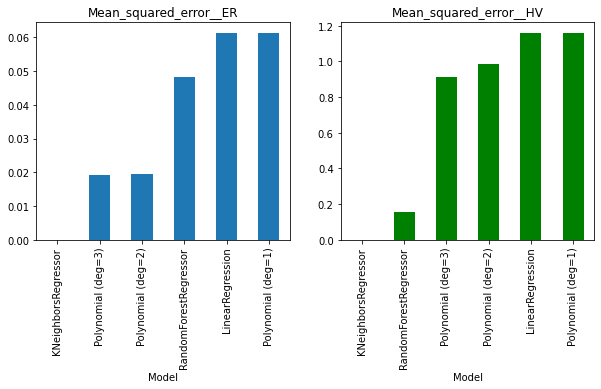

In [ ]:
TestModels = TestModels.sort_values("Mean_squared_error_ER")
TestModels.set_index('Model', inplace=True)
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.Mean_squared_error_ER.plot(ax=axes[0], kind='bar', title='Mean_squared_error__ER')
TestModels = TestModels.sort_values("Mean_squared_error_HV")
TestModels.Mean_squared_error_HV.plot(ax=axes[1], kind='bar', color='green', title='Mean_squared_error__HV')
TestModels.to_excel('/content/Сравнение моделей.xlsx')

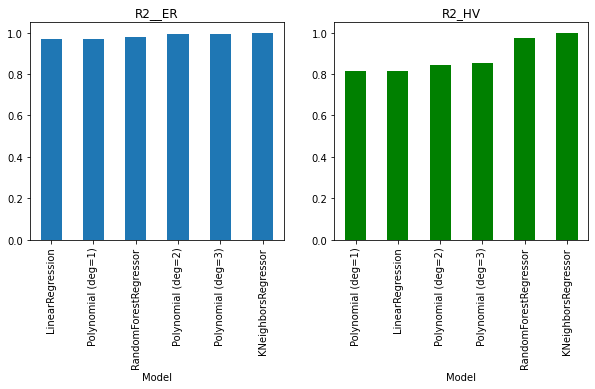

In [ ]:
TestModels = TestModels.sort_values("R2_ER")
#TestModels.set_index('Model', inplace=True)
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_ER.plot(ax=axes[0], kind='bar', title='R2__ER')
TestModels = TestModels.sort_values("R2_HV")
TestModels.R2_HV.plot(ax=axes[1], kind='bar', color='green', title='R2_HV')
TestModels.to_excel('/content/Сравнение моделей_R2.xlsx')

In [ ]:
TestModels

,Model,R2_HV,Mean_squared_error_HV,R2_ER,Mean_squared_error_ER
0,KNeighborsRegressor,1.000000,0.000000,1.000000,0.000000
0,RandomForestRegressor,0.975172,0.154757,0.977036,0.048304
0,Polynomial (deg=3),0.853695,0.911940,0.990918,0.019104
0,Polynomial (deg=2),0.841498,0.987971,0.990807,0.019337
0,LinearRegression,0.813613,1.161783,0.970802,0.061417
0,Polynomial (deg=1),0.813613,1.161783,0.970802,0.061417
